## Miniproject 2: MovieLens Visualization



### Download data

In [2]:
import requests

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv',
     'train.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/train.csv',
     'test.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/test.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')
download_file('train.csv')
download_file('test.csv')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [3]:
import pandas as pd

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data.pivot_table(columns=["Movie ID"], aggfunc="size")

Movie ID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Length: 1682, dtype: int64

Text(0.5, 1.0, 'Ratings of All Movides Combined')

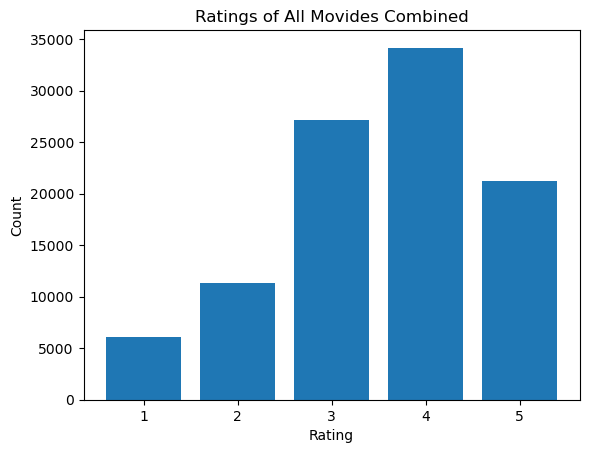

In [6]:
all_ratings = data.pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(all_ratings.index.to_list(), all_ratings.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of All Movides Combined")

[50, 258, 100, 181, 294, 286, 288, 1, 300, 121]


Text(0.5, 1.0, 'Ratings of Ten Most Popular Movies Combined')

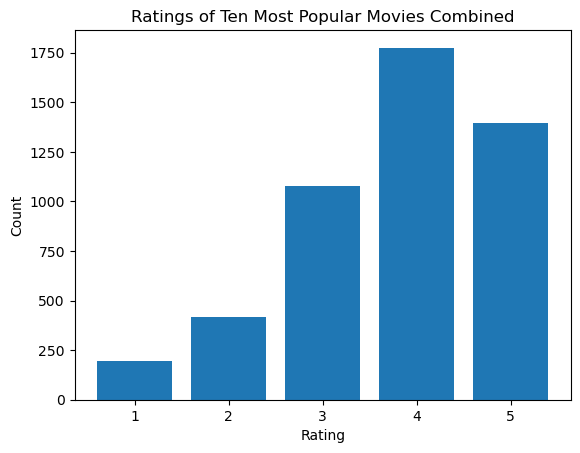

In [7]:
popularity = data.pivot_table(columns=["Movie ID"], aggfunc="size").sort_values(ascending=False)
ten_most_popular = popularity.index.to_list()[:10]
print(ten_most_popular)
popular_ratings = data[data["Movie ID"].isin(ten_most_popular)].pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(popular_ratings.index.to_list(), popular_ratings.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Ten Most Popular Movies Combined")

[814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467]


Text(0.5, 1.0, 'Ratings of Ten Best Movies Combined')

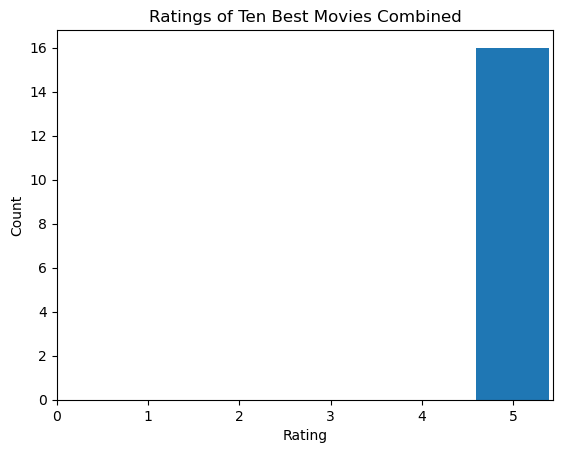

In [8]:
quality = data.pivot_table(values=["Rating"], index=["Movie ID"]).sort_values(by=["Rating"], ascending=False)
ten_highest_rating = quality.index.to_list()[:10]
print(ten_highest_rating)
highest_ratings = data[data["Movie ID"].isin(ten_highest_rating)].pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(highest_ratings.index.to_list(), highest_ratings.values)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Ten Best Movies Combined")

In [9]:
movies.sum()

Movie ID                                                 1415403
Movie Title    Toy Story (1995)GoldenEye (1995)Four Rooms (19...
Unknown                                                        2
Action                                                       251
Adventure                                                    135
Animation                                                     42
Childrens                                                    122
Comedy                                                       505
Crime                                                        109
Documentary                                                   50
Drama                                                        725
Fantasy                                                       22
Film-Noir                                                     24
Horror                                                        92
Musical                                                       56
Mystery                  

Text(0.5, 1.0, 'Ratings of Action Movies Combined')

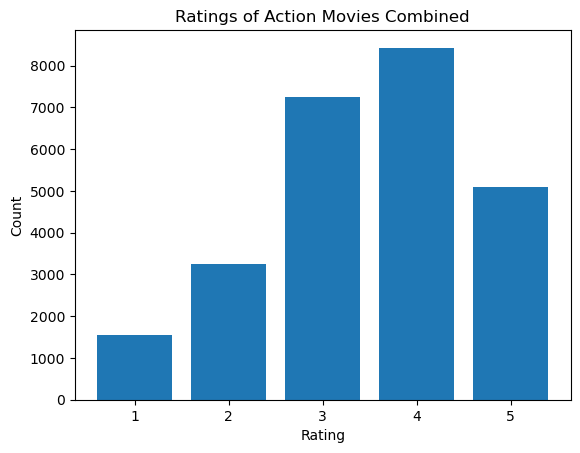

In [15]:
action_movies = movies[movies["Action"] == 1]["Movie ID"].values
action_ratings = data[data["Movie ID"].isin(action_movies)].pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(action_ratings.index.to_list(), action_ratings.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Action Movies Combined")

Text(0.5, 1.0, 'Ratings of Comedies Combined')

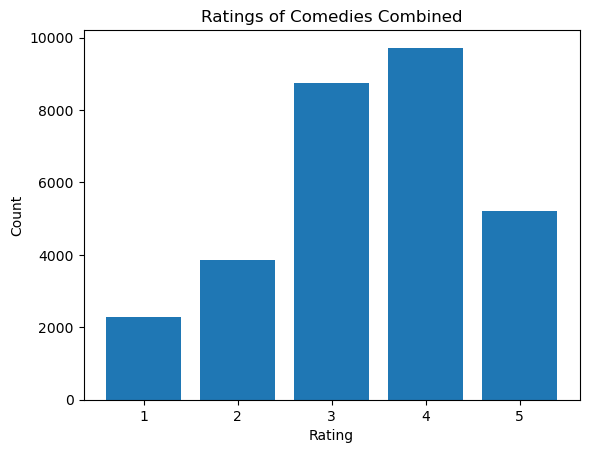

In [17]:
comedies = movies[movies["Comedy"] == 1]["Movie ID"].values
comedy_ratings = data[data["Movie ID"].isin(comedies)].pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(comedy_ratings.index.to_list(), comedy_ratings.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Comedies Combined")

Text(0.5, 1.0, 'Ratings of Documentaries Combined')

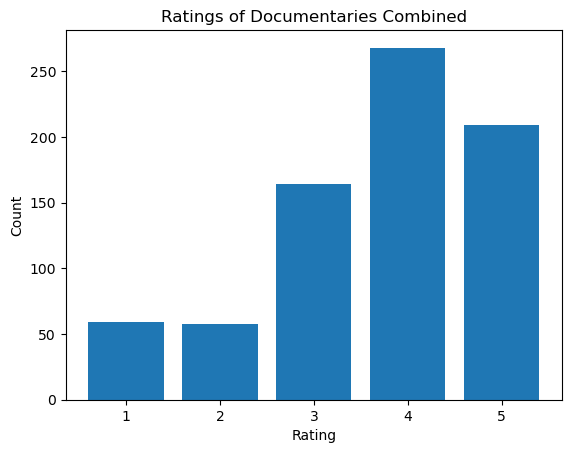

In [18]:
documentaries = movies[movies["Documentary"] == 1]["Movie ID"].values
documentary_ratings = data[data["Movie ID"].isin(documentaries)].pivot_table(columns=["Rating"], aggfunc="size")
plt.bar(documentary_ratings.index.to_list(), documentary_ratings.values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Ratings of Documentaries Combined")